# Getting Started

This Jupyter Notebook introduces the basic tools for digital image processing using the Python programming language. It is adapted from Aleksander Rognhaugen's GitHub repository [aleksaro/digital-image-processing-intro](https://github.com/aleksaro/digital-image-processing-intro).

The notebook assumes that the following Python packages have been installed:

* [NumPy](http://www.numpy.org/)
* [imageio](https://imageio.github.io/)
* [matplotlib](http://matplotlib.org/)

If you are new to Jupyter notebook, then please have a look at the [Jupyter](https://jupyter.org/) website. Though, double clicking the Markdown and Python Code blocks in this document will most likely be more than enough to get you started! 

This is a Jupyter Notebook! Jupyter Notebooks are helpful for organizing and presenting text, code, and output of code in a single document. Let's start with an example. Below is the definition of a function in Python code.

In [1]:
def fib(n):
    # inputs:   n -- positive integer
    # output:   F -- positive integer
    #               nth term in the Fibonacci sequence
    if isinstance(n,int) != True and n > 0:
        raise ValueError('ERROR: The fuction fib() is only defined for positive integers. Value entered is not a positive integer.')
    if n < 2:
        F = n
    else:
        F =  fib(n - 1) + fib(n - 2)
    return F

print('The 6th term in the Fibonacci sequence is',fib(6))

print('We can also print multiple terms in the Fibonacci sequence using the predefined Python functions list, map, and range.')
list(map(fib, range(15)))

The 6th term in the Fibonacci sequence is 8
We can also print multiple terms in the Fibonacci sequence using the predefined Python functions list, map, and range.


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

### Exercise
Answer the questions below based on the code block above.

(a) What does the symbol "#" do?

**Answer:** *Delete this text and type your answer here.*

(b) What happens if you try to compute <code>fib(-2)</code> or <code>fib(.5)</code>?

**Answer:** *Delete this text and type your answer here.*

(c) Briefly explain what the <code>range</code>, <code>map</code>, and <code>list</code> functions do.

**Answer:** *Delete this text and type your answer here.*

### Exercise
Define a function called <code>PracFun</code> below that takes as input two numbers and returns their sum if the two numbers are both positive or both negative and their product otherwise. Then display the output of <code>PracFun(11,25)</code>, <code>PracFun(-7,-113)</code>, and <code>PracFun(5,-18)</code>.

## NumPy

NumPy is a commonly used Python package that adds n-dimensional array objects and several tools for working with them. For MATLAB users wanting to use Python, we recommend taking a look at the [NumPy_for_Matlab_Users](http://scipy.github.io/old-wiki/pages/NumPy_for_Matlab_Users) tutorial.

The n-dimensional array, or [`numpy.ndarray`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.html), is the fundamental component of both NumPy. This section outlines some of the basic routines that can be done using these arrays.

As with all Python packages: they have to be imported before use. NumPy is no different, and the most common way to import it can be seen below:

In [2]:
import numpy as np

### Arrays

NumPy arrays can be initialised in several different ways. The two most common ways are: (i) create them from, possibly nested, Python lists and (ii) create vectors and matrices of all zeros, ones, or a constant value.

Here we create an array with rank 1 from a Python list using the [`numpy.array`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.array.html) function:

In [3]:
np.array([[1,2,3,4],[5,6,7,8]])

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

The rank of a NumPy array is simply the number of dimensions of the array.

While creating the array, we can specify its data type. For example:

In [4]:
np.array([1,2,3,4,5,6,7,8,9], dtype=np.int8)     # 8-bit integer (-128 to 127)

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [5]:
np.array([1,2,3,4,5,6,7,8,9], dtype=np.uint8)    # 8-bit unsigned integer (0 to 255) -- helpful for RGB values

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
np.array([1,2,3,4,5,6,7,8,9], dtype=np.float32)  # 32-bit single precision float

array([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

The [`numpy.iinfo`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.iinfo.html) and [`numpy.finfo`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.finfo.html) functions can be used to inspect the machine limits for integer and floating point types, respectively. For instance:

In [7]:
print('int8: [{}, {}]'.format(np.iinfo(np.int8).min, np.iinfo(np.int8).max))
print('float32: [{:.0f}, {:.0f}]'.format(np.finfo(np.float32).min, np.finfo(np.float32).max))

int8: [-128, 127]
float32: [-340282346638528859811704183484516925440, 340282346638528859811704183484516925440]


Here's an example showcasing what happens when we try to create an array with numbers outside of what the data type expects.

In [8]:
np.array([-300, -50, -1, 0, 1, 50, 300], dtype=np.uint8)

OverflowError: Python integer -300 out of bounds for uint8

Unsurprisingly, we get integer overflow.

It is generally a good idea to explicitly state the type when working with any kind of non-trivial data.

Below are several examples where arrays are created using the [`numpy.zeros`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.zeros.html), [`numpy.ones`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ones.html), and [`numpy.full`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.full.html) functions. Each is created using a tuple that describe the shape of the desired array. The elements of these tuples are the number of rows and columns, respectively.

In [9]:
np.zeros((1,3))  # 1x3 row vector of zeros

array([[0., 0., 0.]])

In [10]:
np.zeros((3,1), dtype=np.float32)  # 3x1 column vector of zeros with an explicit data type 

array([[0.],
       [0.],
       [0.]], dtype=float32)

In [11]:
np.ones((3,3))  # 3x3 matrix of ones

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [12]:
np.full((5,5), 4, dtype=np.int8)  # 5x5 matrix with the constant value 4

array([[4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4]], dtype=int8)

The [`numpy.eye`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.eye.html) function can be used to create arbitrary identity matrices.

In [13]:
np.eye(4)  # 4x4 identity matrix

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

It is also possible to create arrays with random values (for example [`numpy.random.random`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.random.random.html)):

In [14]:
np.random.random((3,4))  # 3x4 matrix with uniformly sampled values from the interval [0.0, 1.0)

array([[0.25171627, 0.74033655, 0.68668493, 0.44373566],
       [0.08111504, 0.25060578, 0.36411767, 0.41082486],
       [0.98591404, 0.92799549, 0.68818578, 0.02511769]])

### Array indexing

NumPy arrays are indexed using standard Python syntax, e.g. `x[i]`, where `x` is an array and `i` is the element we are interested in. **Indexing in Python is 0-based, which means that indexing starts from `0`.** Let's create a vector and a matrix and see how it can be indexed. Notice how the array `mat` is initialised with a nested Python list.

In [15]:
vec = np.array([1,2,3,4,5,6], np.uint8)

mat = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9,10,11,12]], dtype=np.uint8)

Each element can be indexed like this:

In [16]:
vec[4]  # Fifth element

np.uint8(5)

In [17]:
mat[2,1]  # Third row, second column

np.uint8(10)

Notice that for matrices, the first element denotes the row, while the second denotes the column.

NumPy arrays can be sliced by passing a *slice* object which has the following form: `start:stop:stride`. For example:

In [18]:
vec[0:3]  # Only start and stop is used, the stride is 1

array([1, 2, 3], dtype=uint8)

In [19]:
vec[0:6:2]  # View every second element, starting from the first

array([1, 3, 5], dtype=uint8)

In [20]:
mat[1:3, 2:4]  # View second to third row + third to fourth column

array([[ 7,  8],
       [11, 12]], dtype=uint8)

In [21]:
mat[0:3:2,0:4:2]  # View every second row and column

array([[ 1,  3],
       [ 9, 11]], dtype=uint8)

When the colon operator `:` is used alone, it allows you to retrieve all elements in a particular dimension.

In [22]:
mat[1,:]

array([5, 6, 7, 8], dtype=uint8)

Negative indices can be used to index an array backwards.

In [23]:
vec[-1]

np.uint8(6)

In [24]:
mat[-1, -1]

np.uint8(12)

### Exercise

Define the matrix 
$$A = \left[\begin{array}{rrr}
    0 & -1 & 4 \\
    -2 & 5 & 1 \\
    7 & 0 & 9
\end{array}\right]$$
Write code to do the following:

<ol>
    <li> Print the entry in the last row and first column. </li>
    <li> Print the first row. </li>
    <li> Print the second column. </li>
    <li> Print the <m>(1,1)</m>-minor. </li>
</ol>

### Basic operations

Let's define a NumPy array called `matrix` and see if we can perform some operations on it.

In [25]:
matrix = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]], dtype=np.uint8)
print(matrix)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


NumPy arrays have a slew of attributes that can be useful when you want more information about an array.

[`numpy.ndarray.shape`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.shape.html) returns a tuple with the array shape.

In [26]:
matrix.shape

(4, 4)

[`numpy.ndarray.ndim`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.ndim.html) returns the number of dimensions (often referred to as *rank*).

In [27]:
matrix.ndim

2

[`numpy.ndarray.size`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.size.html) returns the total number of elements.

In [28]:
matrix.size

16

[`numpy.ndarray.dtype`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.dtype.html) returns the data type

In [29]:
matrix.dtype

dtype('uint8')

NumPy arrays can be *reshaped* to some other shape using [`numpy.reshape`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.reshape.html) or [`numpy.ndarray.reshape`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.reshape.html). The total number of elements in the reshaped array must, of course, remain the same.

In [30]:
np.reshape(matrix, (2, 8))

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16]], dtype=uint8)

Additionally, an array can be flattened to a 1D vector by using either [`numpy.ravel`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ravel.html) or [`numpy.ndarray.flatten`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.flatten.html).

In [31]:
np.ravel(matrix)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

The data type of an array can be changed using the [`numpy.ndarray.astype`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.astype.html) function. This is very useful when you, for instance, have read data in a data type you do not want to use, or want to apply an operation that would better fit a different data type.

In [32]:
matrix.astype(np.float32)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.]], dtype=float32)

An array can be transposed using [`numpy.transpose`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.transpose.html) or[`numpy.ndarray.T`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.ndarray.T.html).

In [33]:
matrix.T

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]], dtype=uint8)

**Note:** Arrays of rank 1 must be promoted to rank 2 before transpose will work as intended.

In [34]:
vec = np.array([1,2,3])
print('Shape before', vec.shape, ', Shape after', vec.T.shape)
print(vec.T)  # Nothing seems to happen

vec2 = vec[np.newaxis, :]
print('\nShape before', vec2.shape, ', Shape after', vec2.T.shape)
print(vec2.T)  # Transpose works as intended

Shape before (3,) , Shape after (3,)
[1 2 3]

Shape before (1, 3) , Shape after (3, 1)
[[1]
 [2]
 [3]]


### Exercise

Practice with more operations. Define two nonzero $2\times 3$ and one $3\times 4$ matrices. Label the matrices <code>A</code>, <code>B</code>, and <code>C</code>. Compute the following operations and next to each operation in your code write a comment describing the operation.

<ol>
    <li> <code>5+2</code> </li>
    <li> <code>5*2</code> </li>
    <li> <code>5**2</code> </li>
    <li> <code>5/2</code> </li>
    <li> <code>5//2</code> </li>
    <li> <code>A+2</code> </li>
    <li> <code>A*2</code> </li>
    <li> <code>A**2</code> </li>
    <li> <code>A/2</code> </li>
    <li> <code>A//2</code> </li>
    <li> <code>A*B</code> </li>
    <li> <code>np.sqrt(A)</code> </li>
    <li> <code>np.dot(A, C)</code> </li>
    <li> <code>np.dot([1,2,3], [2,2,2])</code> </li>
</ol>

Be sure to check out the [full overview](https://docs.scipy.org/doc/numpy/reference/routines.math.html) over all of the basic mathematical operations that can be applied to NumPy arrays.

## Basic plotting with matplotlib

The most common way to interface with matplotlib is by importing [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html). `%matplotlib inline` is a Jupyter notebook command which allow us to plot inline and is not to be used in a regular Python script.

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

Let's plot a simple line. The [`numpy.linspace`](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.linspace.html) function returns a NumPy array with evenly spaced numbers over a specified interval.

f: [0. 1. 2. 3. 4. 5.] -> [0. 1. 2. 3. 4. 5.]


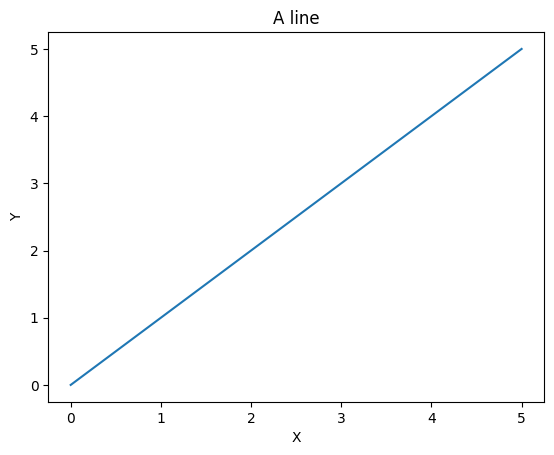

In [36]:
xs = np.linspace(0, 5, 6)  # 6 points between 0 and 5
print('f: {} -> {}'.format(xs, xs))

plt.figure()
plt.plot(xs, xs)
plt.title('A line')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Here is another example where we superimpose two sinusoidal curves.

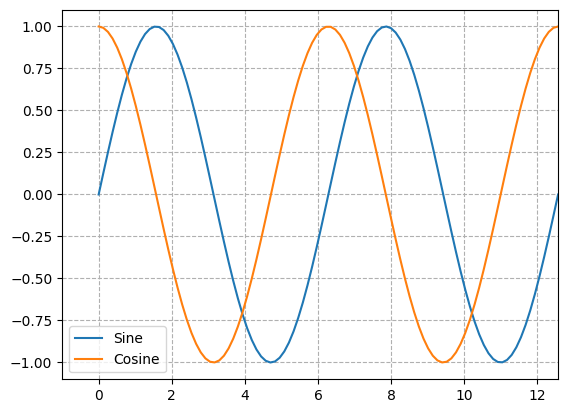

In [37]:
xs = np.linspace(0, 4*np.pi, 100)  # 100 points in the interval [0 and 4*pi]
ys_sin = np.sin(xs)
ys_cos = np.cos(xs)

plt.figure()
plt.plot(xs, ys_sin, label='Sine')
plt.plot(xs, ys_cos, label='Cosine')
plt.xlim(-1, 4*np.pi)  # Limit what is displayed in the x direction
plt.legend()  # Requires that each curve has a label
plt.grid(linestyle='dashed')
plt.show()

Arbitrary functions can be plotted as well. For example, a 1D [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution): $\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$.

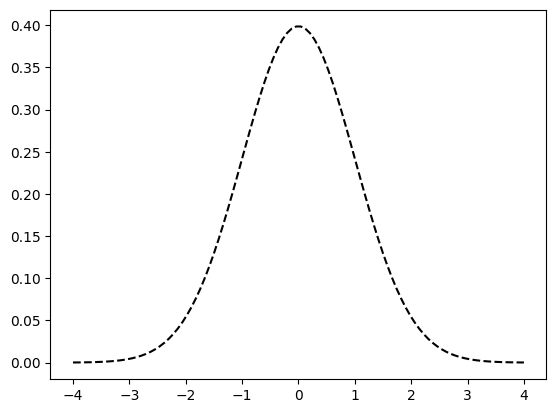

In [38]:
xs = np.linspace(-4, 4, 100)  # 100 points between -4 and 4

sigma = 1.0
mu = 0.0
ys = np.exp(-(xs - mu)**2 / (2 * sigma**2))
ys /= np.sqrt(2 * np.pi * sigma**2)

plt.figure()
plt.plot(xs, ys, linestyle='dashed', color='black')
plt.show()

As before, plots can be superimposed. Here we let the Gaussian probability density function be an anonymous function to make it easier for us to create several plots.

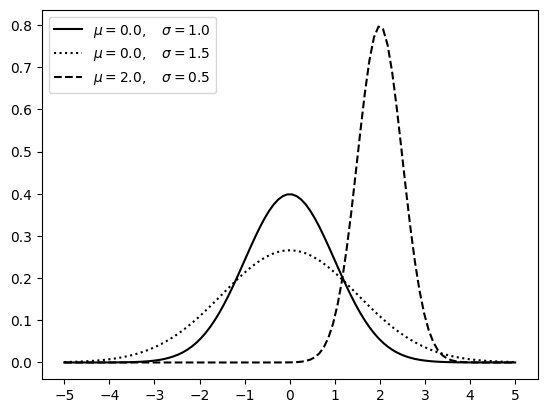

In [39]:
normal = lambda xs, mu, sigma: np.exp(-(xs - mu)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

xs = np.linspace(-5, 5, 100)

plt.figure()
plt.plot(xs, normal(xs, 0.0, 1.0), linestyle='solid',
         color='black', label=r'$\mu=0.0,\quad\sigma=1.0$')
plt.plot(xs, normal(xs, 0.0, 1.5), linestyle='dotted',
         color='black', label=r'$\mu=0.0,\quad\sigma=1.5$')
plt.plot(xs, normal(xs, 2.0, 0.5), linestyle='dashed',
         color='black', label=r'$\mu=2.0,\quad\sigma=0.5$')
plt.xticks(np.arange(-5, 5+1))
plt.legend()
plt.show()

### Exercise

In a single graph, plot the the contours $f(x,y)=0.5,1,2,4$ of the function $f(x,y)=x^2+y^2$.

### Exercise

Often, you may want to do something that you are unsure how to do. Fortunately, there are many resources available to us on the internet. Create a 3-dimensional plot of $f(x,y)=x^2+y^2$ for $-4\leq x,y\leq 4$. 

*Hint:* Try using ChatGPT to write the code for you.

## Reading and writing images

Many Python libraries that offer reading and writing of images simply use the API provided by *PIL* (Python Imaging Library) or the more recent fork: *Pillow*. In this guide, imageio will be used as it provides an easy interface for reading and writing a variety of visual data such as images, videos, and volumetric data. By using imageio, images will be read straight into NumPy arrays.

To run the code below in VS Code or GitHub Codespaces, make sure to install the extension Python Image Preview and run the line <code>pip install imageio</code> in the TERMINAL.

In [40]:
import imageio

Reading and writing images can be done using the [`imageio.imread`](https://imageio.readthedocs.io/en/latest/userapi.html) and [`imageio.imwrite`](https://imageio.readthedocs.io/en/latest/userapi.html) functions, respectively.

## Images as NumPy arrays

Now that we know how to read images, let's read an image and display it using matplotlib.

In [41]:
image = imageio.imread('./sunken-garden.jpg')

/tmp/ipykernel_27476/3908461165.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./sunken-garden.jpg')


Now, let's display the image we read before using matplotlib. In this example, the pixel interpolation has been forced to use nearest neighbour. This is especially useful when dealing with small images as we can see each pixel clearly.

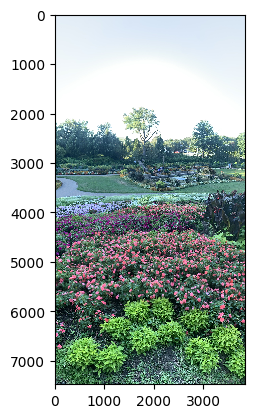

In [42]:
plt.figure()
plt.imshow(image, interpolation='nearest')
plt.show()

A simple colour image consists of three so-called colour channels: red, green, and blue. This means that `image` is in fact a three-dimensional array with the following shape:

In [43]:
image.shape

(7478, 3848, 3)

The first and second axis are the rows and columns respectively, while the last axis is the number of channels. The channels can be operated on separately. The following exemplifies how each channel can be plotted on its own using subplot:

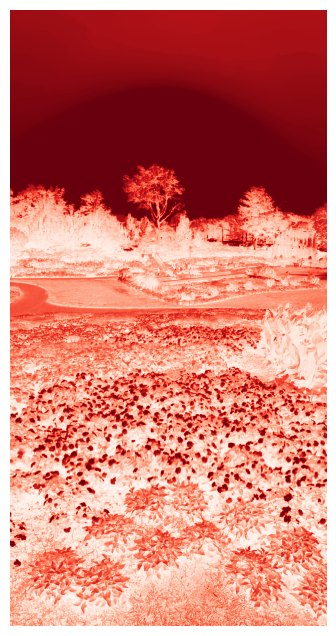

In [56]:
r = image[..., 0]  # Equivalent to image[:, :, 0]

plt.figure(figsize=(10, 8))
plt.imshow(r, cmap=plt.cm.Reds)  # Red colour map
plt.axis('off')

plt.show()

For now, let's assume that the red colour channel is a greyscale image.

In [45]:
grey = image[..., 0]  # Equivalent to image[:, :, 0]
grey.shape

(7478, 3848)

When displaying an image with a single colour channel, such as a greyscale image, it is important to specify the correct colour map. In this case, it would be natural to use the `matplotlib.cm.gray` colour map. If this is not done, matplotlib will elect to use the default colour map instead. See the difference below.

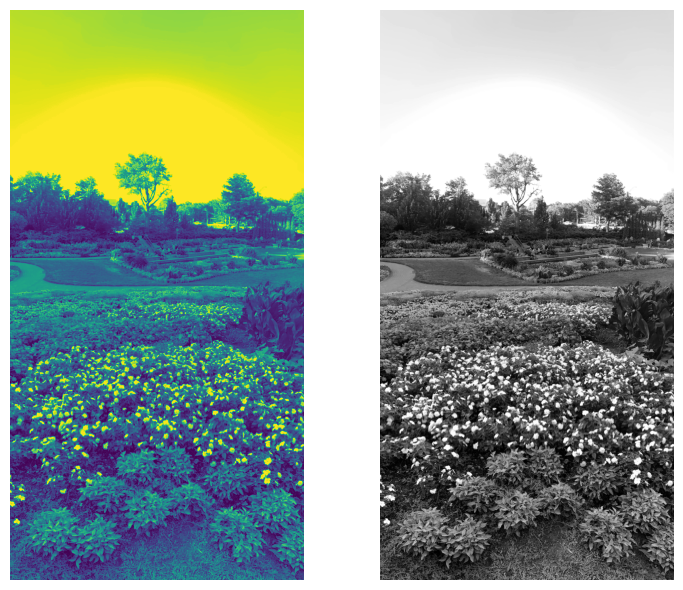

In [46]:
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(grey)  # No colour map specified!
plt.axis('off')
plt.subplot(122)
plt.imshow(grey, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

Seeing as images are NumPy arrays, we can index them just like we did above. For example, we can inspect pixel intensities in a greyscale image like this:

In [47]:
grey[100, 40]

np.uint8(228)

When inspecting pixel intensities in a colour image, it is important to note that there are three values instead of one value.

In [48]:
image[100, 40]

array([228, 238, 247], dtype=uint8)

### Exercise

Adapt the code above for plotting the red channel to plot the green and blue channels of <code>image</code>.

# Python Scripts

Usually when we run Python code we do so by writing and running a Python script. A Python script or .py file is a text file with a Python code meant to run sequentially. As an example, the file HelloWorld.py is a script which prints the phrase "Hello world!".

### Exercise

Within the TERMINAL in your Codespace, type <code>python HelloWorld.py</code> and press ENTER. 

This will be similar to how you'll interact with the Holand Computing Center's supercomputer, writing scripts and using a TERMINAL to run them.